In [4]:
#install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [5]:
#Load the data into a data frame
df = pd.read_csv("https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv", sep=',')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [6]:
#Get the number of trading days
print(df.shape)

(2845, 7)


In [7]:
# Reindex data using a DatetimeIndex
df.set_index(pd.DatetimeIndex(df['Date']), inplace=True)

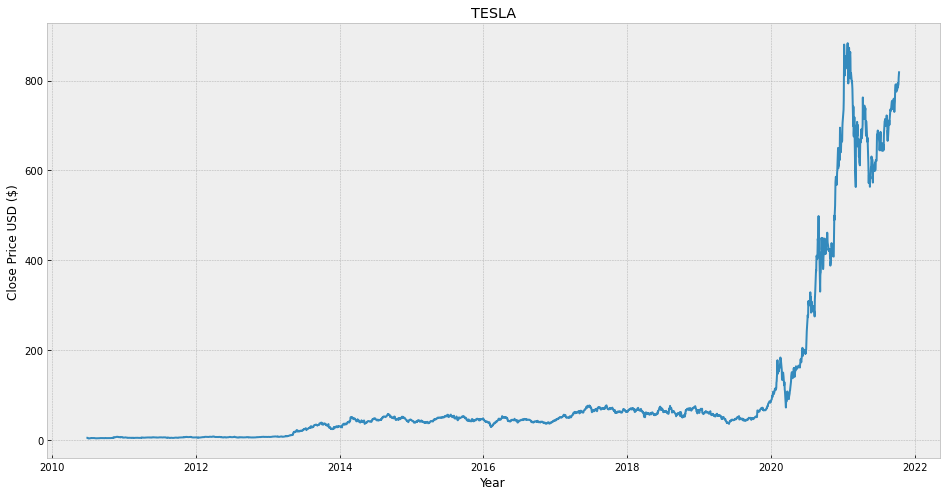

In [8]:
#Visulaize the close price data
plt.figure(figsize=(16,8))
plt.title('TESLA')
plt.xlabel('Year')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [9]:
#Get the close price 
df = df[['Close']]
df.head(4)

,Close
Date,
2010-06-29,4.778
2010-06-30,4.766
2010-07-01,4.392
2010-07-02,3.840


In [10]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' unit/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
Date,,
2021-10-11,791.940002,NaN
2021-10-12,805.719971,NaN
2021-10-13,811.080017,NaN
2021-10-14,818.320007,NaN


In [11]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[  4.778   ]
 [  4.766   ]
 [  4.392   ]
 ...
 [752.919983]
 [753.869995]
 [754.859985]]


C:\Users\erikf\AppData\Local\Temp/ipykernel_3548/1052791523.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [12]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[  4.252      4.09       3.918    ... 805.719971 811.080017 818.320007]


In [13]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [14]:
#Create the models
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [15]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\erikf\AppData\Local\Temp/ipykernel_3548/1296691074.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[714.630005],
       [699.099976],
       [713.76001 ],
       [709.98999 ],
       [707.820007],
       [722.25    ],
       [717.169983],
       [686.169983],
       [665.710022],
       [688.98999 ],
       [673.469971],
       [680.26001 ],
       [706.299988],
       [708.48999 ],
       [711.200012],
       [701.159973],
       [711.919983],
       [730.909973],
       [735.719971],
       [734.090027],
       [732.390015],
       [733.570007],
       [752.919983],
       [753.869995],
       [754.859985]])

In [16]:
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[736.09991938 720.18674004 735.20846023 731.34542788 729.12190797
 743.90791169 738.70256264 706.9377437  685.97300315 709.82732472
 693.92440235 700.88196233 727.5643877  729.80842051 732.58530303
 722.29756042 733.32303685 752.78153989 757.71020814 756.04005085
 754.29809687 755.50720113 775.33457159 776.30802189 777.32243651]


C:\Users\erikf\AppData\Local\Temp/ipykernel_3548/2074720760.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


<IPython.core.display.Javascript object>


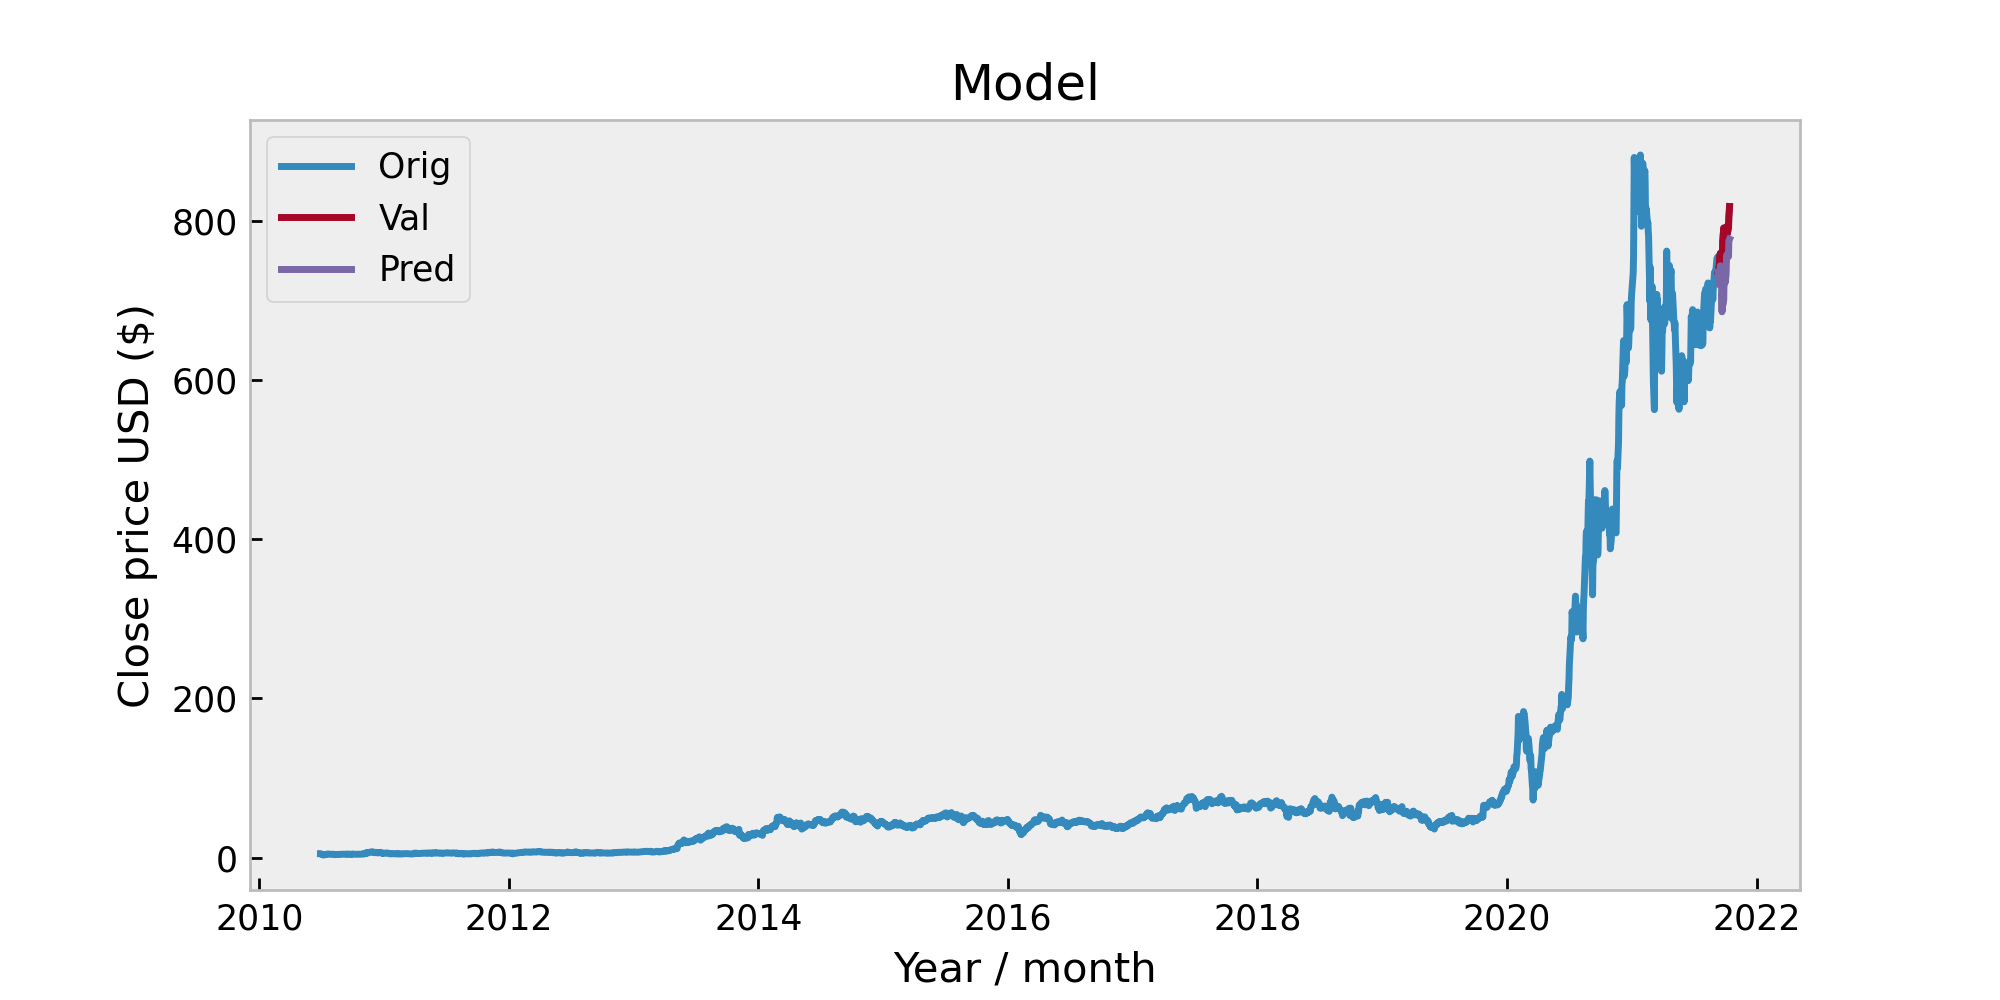

In [17]:
#Visualize the data
%matplotlib notebook
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(8,4))
plt.title('Model')
plt.xlabel('Year / month')
plt.ylabel('Close price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.grid()
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()